In [74]:
#Importing all the important libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import math
%matplotlib inline

In [75]:
dataset=pd.read_csv('C:\\Users\\namit\\Desktop\\SDS Project\\Dataset.csv')

In [76]:
#Checking if the dataset is imported and how many columns have numerical values
dataset.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [77]:
#Checking how many null/NaN values are present in each column
dataset.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [79]:
#To remove columns which have more than 50% empty data

threshold=len(dataset)*0.65
threshold

1022.45

In [80]:
dataset.dropna(thresh=threshold, axis=1, inplace=True)
print(dataset.isnull().sum())

title                            0
title_orig                       0
price                            0
retail_price                     0
currency_buyer                   0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
rating_five_count               45
rating_four_count               45
rating_three_count              45
rating_two_count                45
rating_one_count                45
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                   41
product_variation_size_id       14
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
origin_country                  17
merchant_title      

In [81]:
dataset.shape

(1573, 40)

In [82]:
#Removing observations where all 5 rating column ratings are empty/Removing products which havent been rated
dataset.dropna(thresh=36, inplace=True)
print(dataset.isnull().sum())

title                            0
title_orig                       0
price                            0
retail_price                     0
currency_buyer                   0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
rating_five_count                0
rating_four_count                0
rating_three_count               0
rating_two_count                 0
rating_one_count                 0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                   38
product_variation_size_id       14
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
origin_country                  17
merchant_title      

In [83]:
#Filling NaN observations of product colour which is a categorical column with mode of the column 
dataset['product_color'].fillna(dataset['product_color'].mode()[0], inplace=True)
print(dataset.isnull().sum())

title                            0
title_orig                       0
price                            0
retail_price                     0
currency_buyer                   0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
rating_five_count                0
rating_four_count                0
rating_three_count               0
rating_two_count                 0
rating_one_count                 0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                    0
product_variation_size_id       14
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
origin_country                  17
merchant_title      

In [84]:
#Filling NaN observations of product size which is a categorical column with mode of the column 
dataset['product_variation_size_id'].fillna(dataset['product_variation_size_id'].mode()[0], inplace=True)
print(dataset.isnull().sum())

title                            0
title_orig                       0
price                            0
retail_price                     0
currency_buyer                   0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
rating_five_count                0
rating_four_count                0
rating_three_count               0
rating_two_count                 0
rating_one_count                 0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                    0
product_variation_size_id        0
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
origin_country                  17
merchant_title      

In [85]:
#Filling NaN observations of origin country which is a categorical column with mode of the column 
dataset['origin_country'].fillna(dataset['origin_country'].mode()[0], inplace=True)
print(dataset.isnull().sum())

title                           0
title_orig                      0
price                           0
retail_price                    0
currency_buyer                  0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_title                  0
merchant_name 

In [86]:
#Removing NaN observations of the column merchant name
dataset.dropna(how='any', inplace=True)
print(dataset.isnull().sum())

title                           0
title_orig                      0
price                           0
retail_price                    0
currency_buyer                  0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_title                  0
merchant_name 

In [87]:
#Finding the number of duplicate rows 
dataset.duplicated().sum()

220

In [88]:
#Removing all the duplicate rows
dataset.drop_duplicates(inplace=True)
dataset.shape

(1304, 40)

In [89]:
#Converting all sizes to uppercase and stripping the ends
dataset['product_variation_size_id']=dataset['product_variation_size_id'].str.upper().str.strip()

In [90]:
#Changing irregular values to NaN
dataset['product_variation_size_id']=dataset['product_variation_size_id'].where(lambda x:x.isin(("XXXXS","XXXS","XXS","XS","S","M","L","XL","XXL","XXXL","XXXXL")))

In [91]:
#Filling NaN observations of product size which is a categorical column with mode of the column 
dataset['product_variation_size_id'].fillna(dataset['product_variation_size_id'].mode()[0], inplace=True)


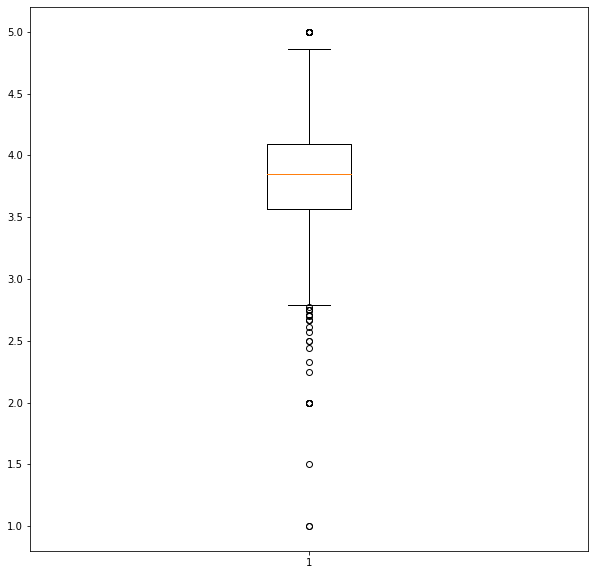

In [92]:
#Box plot of ratings column to check wether there are any outliers beyond the range of [0,5]
ratings_list = dataset['rating'].tolist()
fig = plt.figure(figsize =(10, 10)) 
plt.boxplot(ratings_list)
plt.show() 

[0, 3, 43, 776, 465]


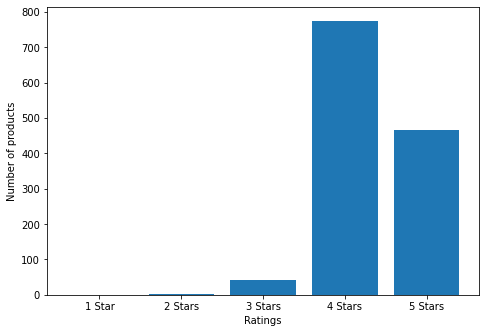

In [93]:
#Bar graph of number of products with a particular rating
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
zero_star_rating = 0
one_star_rating = 0
two_star_rating = 0
three_star_rating = 0
four_star_rating = 0
five_star_rating = 0
ratings = dataset['rating'].tolist()
for i in ratings:
    if(i >= 0 and i < 1):
        one_star_rating = one_star_rating + 1
    if(i >= 1 and i < 2):
        two_star_rating = two_star_rating + 1
    if(i >= 2 and i < 3):
        three_star_rating = three_star_rating + 1
    if(i >= 3 and i < 4):
        four_star_rating = four_star_rating + 1
    if(i >= 4 and i < 5):
        five_star_rating = five_star_rating + 1
final_ratings = []
rating_in_words = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
final_ratings.extend((one_star_rating, two_star_rating, three_star_rating, four_star_rating, five_star_rating))
print(final_ratings)
ax.bar(rating_in_words,final_ratings)
plt.xlabel('Ratings')
plt.ylabel('Number of products')
plt.show()

#print(dataset['rating'])

XXXS :  5
XXS :  70
XS :  276
S :  703
M :  176
L :  45
XL :  15
XXL :  12
XXXL :  1
final size :  [5, 70, 276, 703, 176, 45, 15, 12, 1]


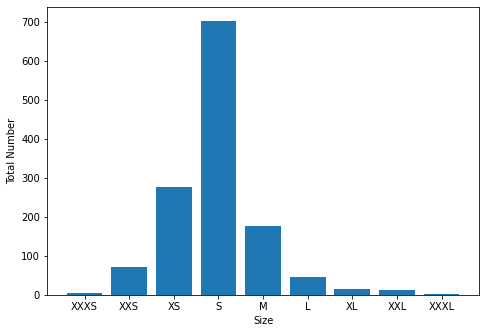

In [94]:
#Bar graph to show total number of products for a particular size
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size_list = dataset['product_variation_size_id'].tolist()
#print(size_list)
size_XXXS = 0
size_XXS = 0
size_XS = 0
size_S = 0
size_M = 0
size_L = 0
size_XL = 0
size_XXL = 0
size_XXXL = 0
for i in size_list:
    if (i == 'XXXS'):
        size_XXXS += 1
    if(i == 'XXS'):
        size_XXS += 1
    if(i == 'XS'):
        size_XS += 1
    if(i == 'S'):
        size_S += 1
    if(i == 'M'):
        size_M += 1
    if(i == 'L'):
        size_L += 1
    if(i == 'XL'):
        size_XL += 1
    if(i == 'XXL'):
        size_XXL += 1
    if(i == 'XXXL'):
        size_XXXL += 1
print("XXXS : ",size_XXXS)
print("XXS : ",size_XXS)
print("XS : ",size_XS)
print("S : ",size_S)
print("M : ",size_M)
print("L : ",size_L)
print("XL : ",size_XL)
print("XXL : ",size_XXL)
print("XXXL : ",size_XXXL)
final_size1 = []
x = []
x.extend((size_XXXS, size_XXS, size_XS, size_S, size_M, size_L, size_XL, size_XXL, size_XXXL))
size_in_words = ['XXXS','XXS','XS','S','M','L','XL','XXL','XXXL']
print("final size : ",x)
ax.bar(size_in_words,x)
plt.xlabel('Size')
plt.ylabel('Total Number')
plt.show()


[0, 110, 56270, 4625420, 3832260]


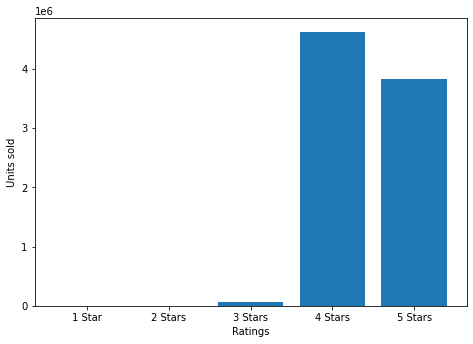

In [95]:
#Bar graph to show total number of units sold for a particular rating
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ratings_list = dataset['rating'].tolist()
units_sold_list = dataset['units_sold'].tolist()
one_star_rating = 0
two_star_rating = 0
three_star_rating = 0
four_star_rating = 0
five_star_rating = 0
index = 0
for i in ratings_list:
    if(i >= 0 and i < 1):
        index = ratings_list.index(i)
        one_star_rating = one_star_rating + units_sold_list[index]
    if(i >= 1 and i < 2):
        index = ratings_list.index(i)
        two_star_rating = two_star_rating + units_sold_list[index]
    if(i >= 2 and i < 3):
        index = ratings_list.index(i)
        three_star_rating = three_star_rating + units_sold_list[index]
    if(i >= 3 and i < 4):
        index = ratings_list.index(i)
        four_star_rating = four_star_rating + units_sold_list[index]
    if(i >= 4 and i < 5):
        index = ratings_list.index(i)
        five_star_rating = five_star_rating + units_sold_list[index]
final_ratings = []
rating_in_words = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
final_ratings.extend((one_star_rating, two_star_rating, three_star_rating, four_star_rating, five_star_rating))
print(final_ratings)
ax.bar(rating_in_words,final_ratings)
plt.xlabel('Ratings')
plt.ylabel('Units sold')
plt.show()

[0, 0, 1, 503, 800]


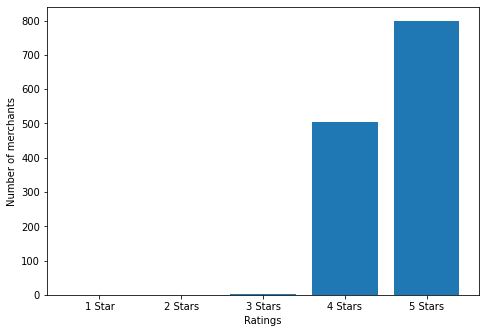

In [96]:
#Bar graph to show total number of merchants for a particular merchant rating
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
one_star_rating = 0
two_star_rating = 0
three_star_rating = 0
four_star_rating = 0
five_star_rating = 0
ratings = dataset['merchant_rating'].tolist()
for i in ratings:
    if(i >= 0 and i < 1):
        one_star_rating = one_star_rating + 1
    if(i >= 1 and i < 2):
        two_star_rating = two_star_rating + 1
    if(i >= 2 and i < 3):
        three_star_rating = three_star_rating + 1
    if(i >= 3 and i < 4):
        four_star_rating = four_star_rating + 1
    if(i >= 4 and i < 5):
        five_star_rating = five_star_rating + 1
final_ratings = []
rating_in_words = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
final_ratings.extend((one_star_rating, two_star_rating, three_star_rating, four_star_rating, five_star_rating))
print(final_ratings)
ax.bar(rating_in_words,final_ratings)
plt.xlabel('Ratings')
plt.ylabel('Number of merchants')
plt.show()

In [97]:
#To compute the mean and standard deviation of each column of the dataset
newDataset = dataset.drop(dataset.columns[0], axis = 1)
print("\nMean of all columns:-\n")
mean = newDataset.mean()
print(mean)
print("\nVariance of all columns:-\n")
var = newDataset.var()
print(var)
newDataset


Mean of all columns:-

price                               8.463635
retail_price                       23.893405
units_sold                       4955.842791
uses_ad_boosts                      0.437117
rating                              3.808704
rating_count                     1009.204755
rating_five_count                 487.786810
rating_four_count                 197.950153
rating_three_count                148.412577
rating_two_count                   70.194785
rating_one_count                  104.860429
badges_count                        0.115798
badge_local_product                 0.021472
badge_product_quality               0.079755
badge_fast_shipping                 0.014571
product_variation_inventory        34.025307
shipping_option_price               2.384969
shipping_is_express                 0.003067
countries_shipped_to               40.641871
inventory_total                    49.784509
merchant_rating_count           28135.579755
merchant_rating                

,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,...,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,...,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,...,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,...,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,...,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,3.00,8,EUR,100,1,3.79,57,25.0,10.0,...,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,https://www.wish.com/c/5e8f0165e815903d022a3c7c,https://contestimg.wish.com/api/webimage/5e8f0...,5e8f0165e815903d022a3c7c,summer,2020-08
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,7,EUR,20000,1,4.25,3127,1919.0,580.0,...,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,https://www.wish.com/c/5c91a7ae7cfe8e4e64c36d97,https://contestimg.wish.com/api/webimage/5c91a...,5c91a7ae7cfe8e4e64c36d97,summer,2020-08
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,...,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,15.0,...,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08


In [98]:
#To normalize all the columns of the dataset
newset = dataset.drop(dataset.columns[0], axis = 1)
x_data = newset[['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory','shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'merchant_rating_count', 'merchant_rating', 'merchant_has_profile_picture']]
x_data = x_data.apply(lambda x: (x - x.mean(axis=0)) / x.std(axis=0)) 
print("\nMean of all columns after normalization:-\n")
print(x_data.mean())
print("\nVariance of all columns after normalization:-\n")
print(x_data.var())
x_data


Mean of all columns after normalization:-

price                           2.276213e-16
retail_price                    9.297266e-17
units_sold                      7.492303e-18
uses_ad_boosts                  4.520924e-16
rating                         -6.914203e-16
rating_count                   -1.489947e-17
rating_five_count               2.077411e-17
rating_four_count              -2.107210e-17
rating_three_count             -2.358373e-17
rating_two_count               -3.426877e-17
rating_one_count               -4.725259e-18
badges_count                    2.098696e-16
badge_local_product             1.012738e-16
badge_product_quality           4.618834e-16
badge_fast_shipping             3.865986e-16
product_variation_inventory    -2.191499e-16
shipping_option_price          -4.594995e-16
shipping_is_express             1.245063e-16
countries_shipped_to            1.122302e-16
inventory_total                -7.446114e-16
merchant_rating_count          -1.524002e-17
merchant_ra

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,1.889609,-0.321394,-0.482926,-0.880892,-0.107676,-0.451271,-0.446812,-0.449817,-0.419218,-0.431597,...,-0.294279,-0.121551,0.761429,1.553233,-0.055449,-0.332694,0.076591,-0.326577,0.447560,-0.426721
1,-0.116248,-0.061509,1.496181,1.134342,-0.793029,2.421597,1.723452,1.963256,2.936646,3.579067,...,-0.294279,-0.121551,0.761429,-0.370239,-0.055449,0.017939,0.076591,-0.123008,-0.726918,-0.426721
2,-0.116248,0.620691,-0.482926,-0.880892,-0.527731,-0.470168,-0.467131,-0.459289,-0.443448,-0.437835,...,-0.294279,-0.121551,-1.574142,0.591497,-0.055449,-0.232513,0.076591,-0.329811,-0.264219,-0.426721
3,-0.116248,-0.516308,0.004392,1.134342,0.489245,-0.203243,-0.186535,-0.186960,-0.186004,-0.175863,...,-0.294279,-0.121551,0.761429,-0.370239,-0.055449,0.017939,0.076591,-0.050982,-0.107154,-0.426721
4,-1.440114,-0.678737,-0.482926,1.134342,-1.566815,-0.467333,-0.466163,-0.459289,-0.443448,-0.425360,...,-0.294279,-0.121551,-1.574142,-1.331975,-0.055449,-0.282603,0.076591,-0.161746,-0.203877,-0.426721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,-1.369909,-0.516308,-0.482926,1.134342,-0.041351,-0.449853,-0.447779,-0.445081,-0.410132,-0.419122,...,-0.294279,-0.121551,-1.574142,-1.331975,-0.055449,0.017939,0.076591,-0.284973,-0.273664,-0.426721
1567,-0.116248,-0.548794,1.496181,1.134342,0.975625,1.000517,1.384801,0.904725,0.471237,0.360556,...,3.395528,-0.121551,0.761429,-0.370239,-0.055449,0.168210,0.076591,-0.134251,0.583617,-0.426721
1568,-0.617712,-0.483823,0.501655,1.134342,0.599786,0.169034,0.226618,0.225086,0.110814,0.042447,...,-0.294279,-0.121551,0.761429,-0.370239,-0.055449,0.017939,0.076591,-0.270330,0.940675,-0.426721
1570,-0.868444,-0.158966,-0.482926,-0.880892,-0.218216,-0.448908,-0.448747,-0.433241,-0.425276,-0.419122,...,-0.294279,-0.121551,-0.906836,-0.370239,-0.055449,-1.484771,0.076591,-0.330818,-0.407537,-0.426721


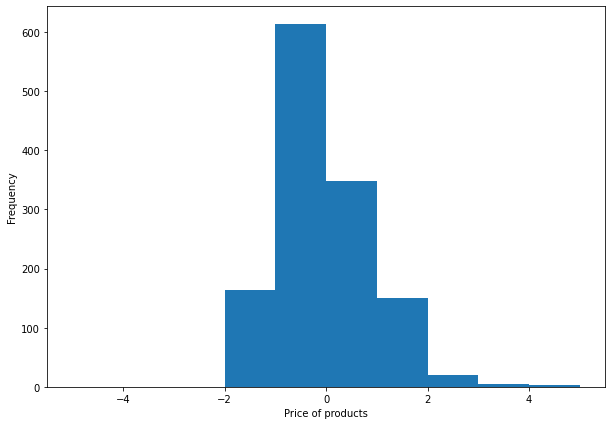

In [99]:
#To plot a histogram of price column to show that a dataset is normalized 
price = x_data['price'].tolist()
fig, ax = plt.subplots(figsize=(10,7))
ax.hist(price, bins=[-5,-4,-3,-2,-1,0,1,2,3,4,5])
plt.xlabel("Price of products")
plt.ylabel("Frequency")
plt.show()

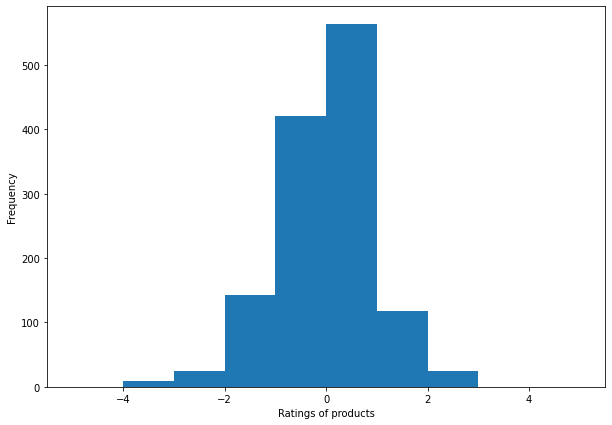

In [100]:
##To plot a histogram of rating column to show that a dataset is normalized
ratings = x_data['rating'].tolist()
fig, ax = plt.subplots(figsize=(10,7))
ax.hist(ratings, bins=[-5,-4,-3,-2,-1,0,1,2,3,4,5])
plt.xlabel("Ratings of products")
plt.ylabel("Frequency")
plt.show()

In [101]:
#For Hypothesis testing of average units sold of population
dataset=pd.read_csv('C:\\Users\\namit\\Desktop\\SDS Project\\Cleaned Dataset.csv') 
dataset["units_sold"].mean()
sampData=dataset["units_sold"][np.argsort(np.random.random(1304))[:70]]
np.random.seed(1)
meanSampData=sampData.mean()
hypMean=5000
N=70
standPop=np.std(dataset["units_sold"])
(meanSampData-hypMean)/(standPop/math.sqrt(N))

-0.016647990750719766

0.007751313873187253


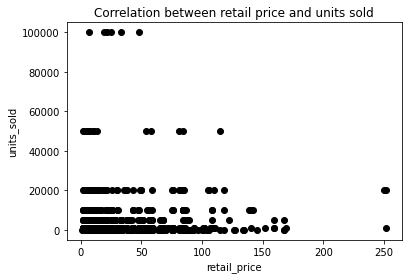

In [102]:
#Finding the correlation between the retail price and units sold of each product
print(dataset["retail_price"].corr(dataset["units_sold"]))

plt.scatter(dataset["retail_price"],dataset["units_sold"], color="k")
plt.xlabel("retail_price")
plt.ylabel("units_sold")
plt.title("Correlation between retail price and units sold")
plt.show()
#We can infer that there is almost no correlation between the two


0.06264678224907981


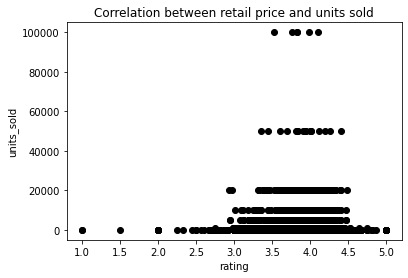

In [103]:
#Finding the correaltion between the units_sold and the rating of each product
print(dataset["rating"].corr(dataset["units_sold"]))

plt.scatter(dataset["rating"],dataset["units_sold"], color="k")
plt.xlabel("rating")
plt.ylabel("units_sold")
plt.title("Correlation between retail price and units sold")
plt.show()
#We can infer althought there is a positive correaltion it almost negligible